In [5]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [100]:
df = pd.read_parquet("data/cnb_ceska_proza.parquet")
df = pd.concat([df, pd.read_parquet(os.path.join("data","cnb_ceska_poezie.parquet"))])
df

,rok,titul,autorstvo,autorstvo_kod,100_7
001,,,,,
bknjje05009,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422,NaN
cpk20041494224,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049,NaN
bknjaj17284,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None,NaN
nkc20051626328,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969,NaN
cpk20162825404,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522,NaN
...,...,...,...,...,...
nkc20243627862,2024.0,Nějakým způsobem,Pospíšil Libor,NaN,jo2015866694
nkc20243627863,2024.0,Než nám dali jména...,Dlabal Milan Daniel,NaN,ola20241236036
nkc20243641181,2024.0,Vzpomínky ze šuplíku,Koudelka Petr,NaN,ola20241217490


In [102]:
df = df[df['rok'].notnull()]

In [104]:
df = df[~df['100_7'].isnull()]

In [106]:
df['100_7']

001
bknvla04792           jk01101689
nkc20061639418        jk01141705
bknhak08849           jk01082969
cpk20051500789        jk01132744
cpk20021065593        jk01041385
                       ...      
nkc20243627862      jo2015866694
nkc20243627863    ola20241236036
nkc20243641181    ola20241217490
nkc20243631311         xx0284340
nkc20243604525    ola20191058844
Name: 100_7, Length: 16573, dtype: object

In [108]:
wikid = pd.read_parquet(os.path.join('data','wikidata.parquet'))
wikid = wikid[['w_umrti','w_narozeni','obcanstvi']]

In [110]:
wikid

,w_umrti,w_narozeni,obcanstvi
jk01010005,1960.0,1877.0,"[Československo, Předlitavsko]"
jk01010022,1971.0,1890.0,[Československo]
jk01010023,2008.0,1928.0,[Československo]
jk01010026,1974.0,1889.0,[Československo]
jk01010030,1599.0,1546.0,[Čechy]
...,...,...,...
zmp2016925673,NaN,1954.0,[Spojené státy americké]
zmp2016925675,1870.0,1791.0,None
zmp20191037071,NaN,1986.0,"[Spojené státy americké, Německo]"
zmp20191054500,1943.0,1902.0,[Německá říše]


In [112]:
len(df)

16573

In [114]:
df = df.merge(wikid, left_on='100_7', right_index=True, how='left')

In [116]:
len(df)

16573

In [118]:
df = df[df['obcanstvi'].astype(str).str.contains('Česk')]

In [120]:
len(df)

7480

In [122]:
def narozeni(radek):
    if radek['100_d'] != None:
        if '-' in radek['100_d']:
            if len(radek['100_d'].split('-')[0]) == 4:
                return pd.to_numeric(radek['100_d'].split('-')[0])
    elif radek['w_narozeni'] != None:
        return pd.to_numeric(radek['w_narozeni'])

In [124]:
def umrti(radek):
    if radek['100_d'] != None:
        if '-' in radek['100_d']:
            if len(radek['100_d'].split('-')[1]) == 4:
                return pd.to_numeric(radek['100_d'].split('-')[1])
    elif radek['w_umrti'] != None:
        return pd.to_numeric(radek['w_umrti'])

In [128]:
stovky = pd.read_parquet('data/cnb_sloupce/100.parquet')

In [134]:
stovky = stovky[['100_d']]
stovky

,100_d
001,
ck8300078,None
ck8300080,None
ck8300081,None
ck8300082,1925-2015
ck8300083,1921-
...,...
cpk20253667550,1899-1976
cpk20253667553,1873-1959
cpk20253667557,1865-1928


In [138]:
df = df.merge(stovky, how='left', left_index=True, right_index=True)

In [182]:
df = df.merge(pd.read_parquet(os.path.join("data/cnb_sloupce","655.parquet")), how='left', left_index=True, right_index=True)

In [140]:
df['narozeni'] = df.apply(lambda row: narozeni(row), axis=1)
df['umrti'] = df.apply(lambda row: umrti(row), axis=1)

In [142]:
df[['100_d','w_narozeni','w_umrti','narozeni','umrti']].sample(50)

,100_d,w_narozeni,w_umrti,narozeni,umrti
001,,,,,
nkc20081800617,1917-1971,1917.0,1971.0,1917.0,1971.0
cpk20031247237,1875-1947,1875.0,1947.0,1875.0,1947.0
ck9000590,1943-,1943.0,NaN,1943.0,NaN
nkc20213327797,1946-,1946.0,NaN,1946.0,NaN
bk196804697,1909-1987,1909.0,1987.0,1909.0,1987.0
bkn20011003594,1881-1943,1881.0,1943.0,1881.0,1943.0
nkc20132434276,1921-2013,1921.0,2013.0,1921.0,2013.0
nkc20102104025,1858-1923,1858.0,1923.0,1858.0,1923.0
nkc20172933006,1945-,1945.0,NaN,1945.0,NaN


In [144]:
df = df[df['narozeni'] >= 1924]

In [146]:
df = df[(df['umrti'] > df['rok']) & (df['umrti'].notnull())]

In [148]:
len(df)

1379

In [150]:
df = df.sort_values(by='rok')

In [154]:
df = df.drop_duplicates(subset=['autorstvo','titul'], keep='first')

In [156]:
df['100_7'].nunique()

320

In [158]:
df

,rok,titul,autorstvo,autorstvo_kod,100_7,w_umrti,w_narozeni,obcanstvi,100_d,narozeni,umrti
001,,,,,,,,,,,
bk194602256,1946.0,Balada z regálu,Diviš Ivan,NaN,jk01022321,1999.0,1924.0,[Česko],1924-1999,1924.0,1999.0
cpk19990606474,1946.0,Náhrobní kámen,Šotola Jiří,NaN,jk01130767,1989.0,1924.0,[Československo],1924-1989,1924.0,1989.0
bk195301260,1953.0,"Člověk, zahrada širá",Kundera Milan,NaN,jk01070894,2023.0,1929.0,"[Francie, Česko, Československo, apatrida]",1929-2023,1929.0,2023.0
bk195403613,1954.0,Bez ubrousku,Pick Jiří Robert,NaN,jk01092970,1983.0,1925.0,[Československo],1925-1983,1925.0,1983.0
gk00101911,1954.0,K některým otázkám specifičnosti satirického o...,Pick Jiří Robert,NaN,jk01092970,1983.0,1925.0,[Československo],1925-1983,1925.0,1983.0
...,...,...,...,...,...,...,...,...,...,...,...
nkc20223478502,2022.0,Pití Sokratovo,Erbová Karla,NaN,jk01030539,2024.0,1933.0,[Česko],1933-2024,1933.0,2024.0
nkc20243586681,2022.0,"Radost je lehkost, vánek, studená voda",Zajíček Pavel,NaN,jn99240001496,2024.0,1951.0,"[Česko, Československo]",1951-2024,1951.0,2024.0
nkc20223476685,2022.0,"Poetický pel-mel, aneb, Básně a texty rozmanité",Kratěna Jaroslav,NaN,jx20060117058,2024.0,1947.0,[Česko],1947-2024,1947.0,2024.0


<Axes: xlabel='rok'>

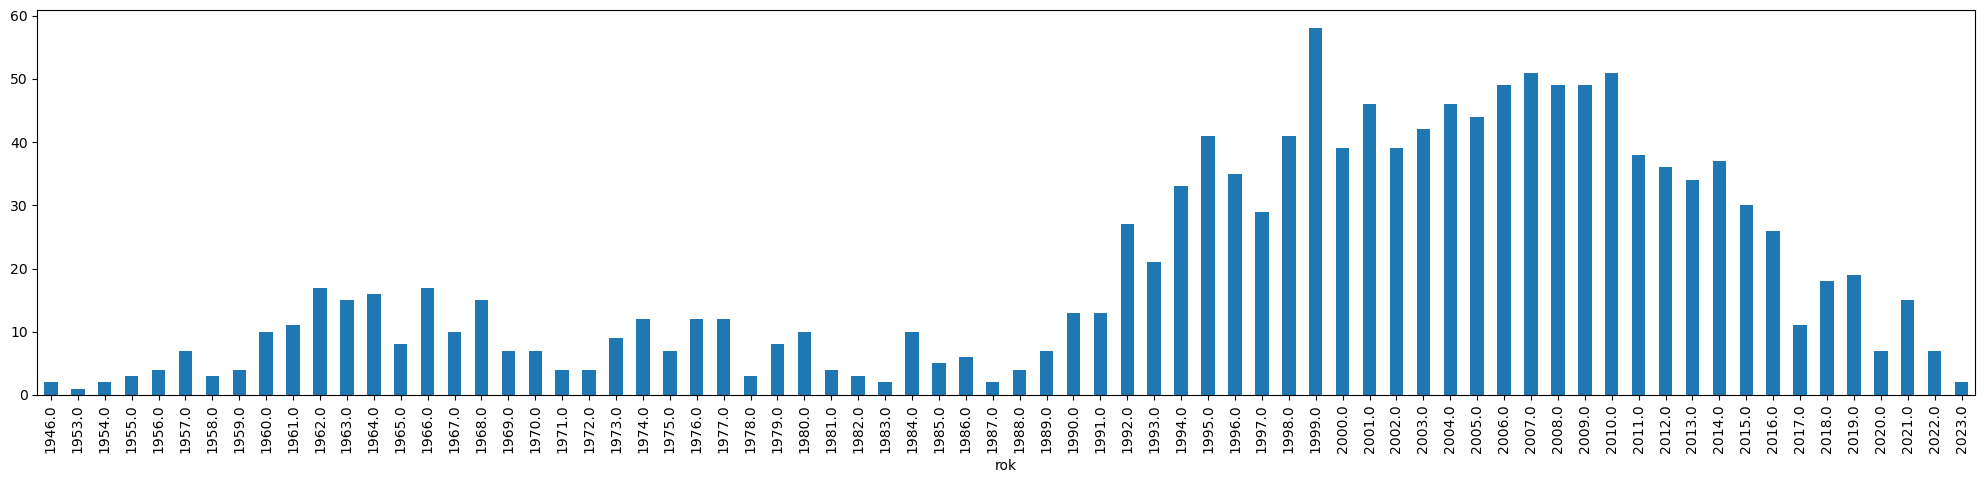

In [160]:
df.groupby('rok').size().plot.bar(figsize=(25,5))

In [162]:
df['vek'] = df['rok'] - df['narozeni']

<Axes: ylabel='Frequency'>

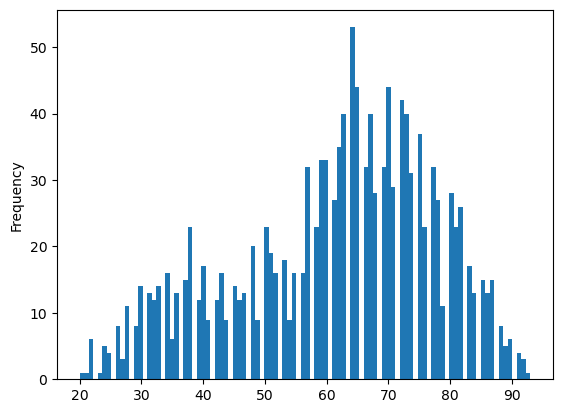

In [164]:
df['vek'].plot.hist(bins=100)

In [166]:
df[df['vek'] < 0]

,rok,titul,autorstvo,autorstvo_kod,100_7,w_umrti,w_narozeni,obcanstvi,100_d,narozeni,umrti,vek
001,,,,,,,,,,,,


In [168]:
df = df[df['vek'] > 0]

In [172]:
df[df['vek'] > 100][['100_7','autorstvo','titul','100_d','rok','narozeni','umrti','vek']].drop_duplicates(subset=['100_7'],keep="first")

,100_7,autorstvo,titul,100_d,rok,narozeni,umrti,vek
001,,,,,,,,


In [174]:
df = df.dropna(subset=['vek'])

In [176]:
len(df)

1379

In [35]:
df

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,w_umrti,w_narozeni,obcanstvi,narozeni,umrti,vek
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk193302228,990906s1933 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01072317,"Löbl, Karel,",1925-2021,None,Vápenná odměrka Regula /,Napsal ing. Karel Löbl,None,None,None,None,None,[Praha Karlín :],"[Havelka a Mész,]",[1933],None,None,None,None,None,None,None,[15 - [I] s. ;],None,[4°],[[Publikace] strojírny Havelka a Mész ;],[Č. II],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Publikace strojírny Havelka a Mész],None,None,nam a22 1 4500,1933.0,2021.0,1925.0,[Československo],1925.0,2021.0,8.0
bk193602034,990311s1936 xr a 000 | cze,None,None,[(Brožováno)],None,None,None,None,None,None,None,[aut],jk01051960,"Jírů, Pavel,",1929-2002,None,Březnický průmysl impregnace dřeva /,Pavel Jírů,None,None,None,None,None,None,None,None,None,None,None,[V Praze :],"[Bozeň, spolek rodáků a přátel města Březnice,]",[1936],[1],[43 stran :],[ilustrace ;],[21 cm],[Březnická knihovnička ;],[9],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Březnická knihovnička],None,None,nam a22 1i 4500,1936.0,2002.0,1929.0,[Československo],1929.0,2002.0,7.0
bk193603223,990420s1936 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jo20000071081,"Mezřický, Václav,",1934-2018,None,"Neplodnost skotu, její příčiny a tlumení /",[Napsal] MVDr. V. Mezřický,None,None,None,None,None,[V Brně :],"[Družstvo zvěrolékařů,]",[1936],None,[(Ant. Okáč)],None,None,None,None,None,[50 s. ;],None,[8°],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1936.0,2018.0,1934.0,"[Československo, Česko]",1934.0,2018.0,2.0
bk193900824,990125s1939 xr cze,None,None,None,None,None,None,None,None,None,None,[aut],jk01040183,"Hauptman, Jaroslav,",1928-2008,None,Uhříněveský školní závod zemědělský Vysoké ško...,Jaroslav Hauptman,None,None,None,None,None,[V Praze :],"[nákladem vlastním,]",[1939],None,[(Orbis)],None,None,None,None,None,[16 s. ;],None,[4°],None,None,[Zvláštní otisk ze Sborníku prací k poctě šede...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1939.0,2008.0,1928.0,[Československo],1928.0,2008.0,11.0
bk194000671,990223s1940 xr 000 cze,None,None,[(Brož.)],None,None,None,None,None,None,None,[aut],jn19981000688,"Dobiáš, Bohumil,",1929-2001,None,Život a práce Václava Mařana /,Bohumil Dobiáš,None,None,None,None,None,[V Táboře :],"[Petr Frank,]",[1940],None,None,None,None,None,None,None,[35 s. ;],None,[17 cm],[Jihočeská Edice - sbírka soukromých tisků ;],[sv. 2],"[V grafické úpravě Petra Franka, Soukromý tisk...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Jihočeská Edice - sbírka soukromých tisků],None,None,nam a22 1 4500,1940.0,2001.0,1929.0,[Československo],1929.0,2001.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20233521610,230531s2023 xr a e 000 0 cze d,[978-80-907870-7-0],None,[(vázáno)],None,None,None,None,[81],[Lingvistika. Jazyky],"[(0.027.6), 811.111'25, 81'255.4, (048.8)]",[aut],jn20000401683,"Macek, Miroslav,",1944-2024,None,Setkání se Shakespearovými sonety :,studie Miroslava Macka ; s originálními litogr...,None,None,None,No

<Axes: xlabel='rok'>

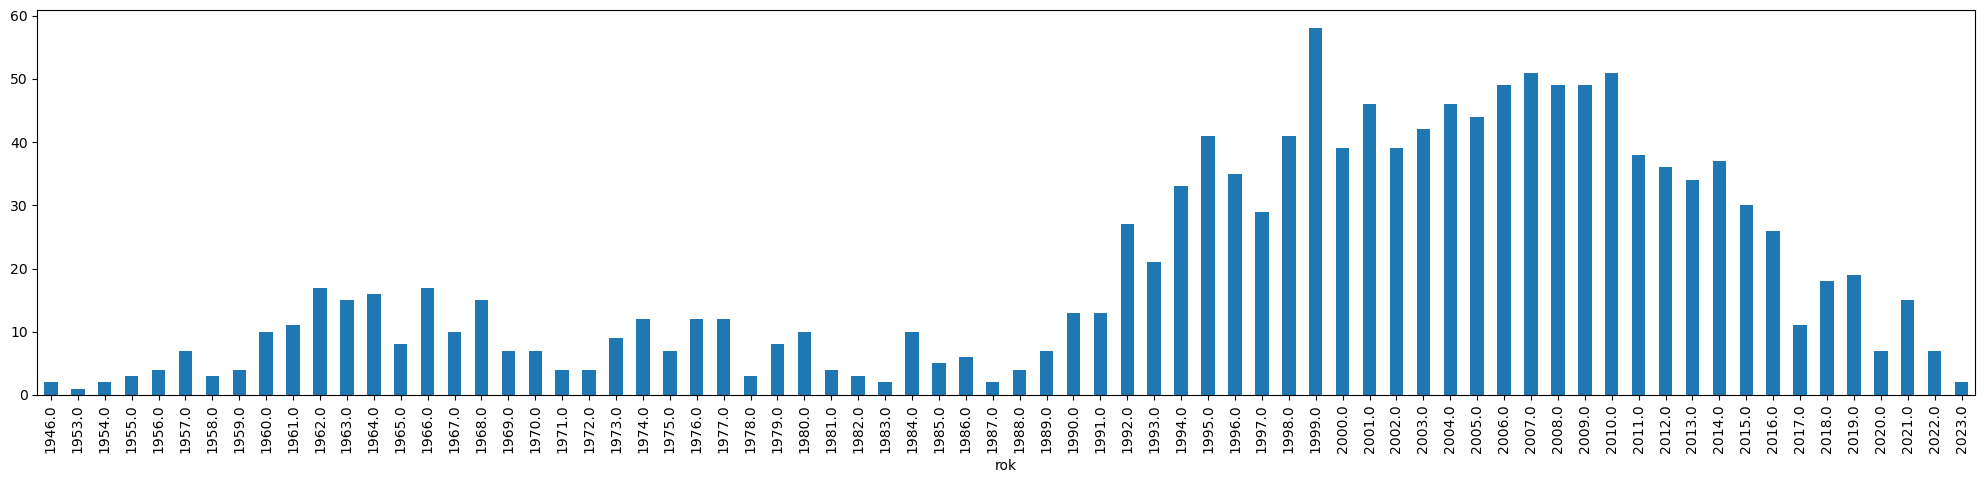

In [178]:
df.groupby('rok').size().plot.bar(figsize=(25,5))

In [184]:
', '.join(df.explode("655_a").groupby("655_a").size().nlargest(200).index.to_list())

"česká poezie, Czech poetry, poezie, publikace pro děti, lyrická poezie, bibliofilie, výbory, children's literature, bibliophilie, lyric poetry, české prózy, říkadla, selected works, náboženská poezie, religious poetry, Czech prose, písňové texty, obrazové publikace, essays, autobiografické vzpomínky, children's poetry, studie, autobiographical reminiscences, pictorial works, sebrané spisy, song texts, úvahy, poezie v próze, collected works, fotografické publikace, leporela, bilingual editions, dvojjazyčná vydání, folding picture-books, photographical works, prose poems, Children's poetry, Czech, aforismy, experimental poetry, experimentální poezie, sbírky, studies, české pohádky, deníky, diaries, eseje, satirická poezie, aphorisms, children’s literature, epigramy, rozhovory, biografie, Czech fairy tales, interviews, jubilejní publikace, komentovaná vydání, milostná poezie, reminiscences, sborníky, vzpomínky, české povídky, epigrams, haiku, humoristická poezie, humorous poetry, jubilee

In [186]:
def kategorie(spp):
    spp = str(spp)
    if ('román' in spp) or ('příběh' in spp) or ('povídk' in spp) or ('stories' in spp) or ('próz' in spp):
        return 'próza'
    elif ('poezie' in spp) or ('poetry' in spp):
        return 'poezie'
    elif ('vzpomínk' in spp) or ('reminisc' in spp):
        return 'vzpomínky'
    else:
        return None

In [188]:
df['kategorie'] = df['655_a'].apply(lambda x: kategorie(x))

In [190]:
df['kategorie'].sample(20)

001
np9538448         poezie
cpk20041326425    poezie
nkc20152709938    poezie
cpk19990770538    poezie
nkc19990650601      None
cpk20051174847    poezie
bk195702197       poezie
nkc20091856608    poezie
cpk20010711589      None
nkc20061637492    poezie
cpk19960103766    poezie
nkc20112198901    poezie
ck8605712         poezie
cpk20000532492    poezie
nkc20061691212    poezie
nkc20152652250    poezie
cpk20203260010    poezie
cpk19980362936    poezie
nkc20102107477    poezie
nkc20061649373    poezie
Name: kategorie, dtype: object

<Axes: xlabel='rok'>

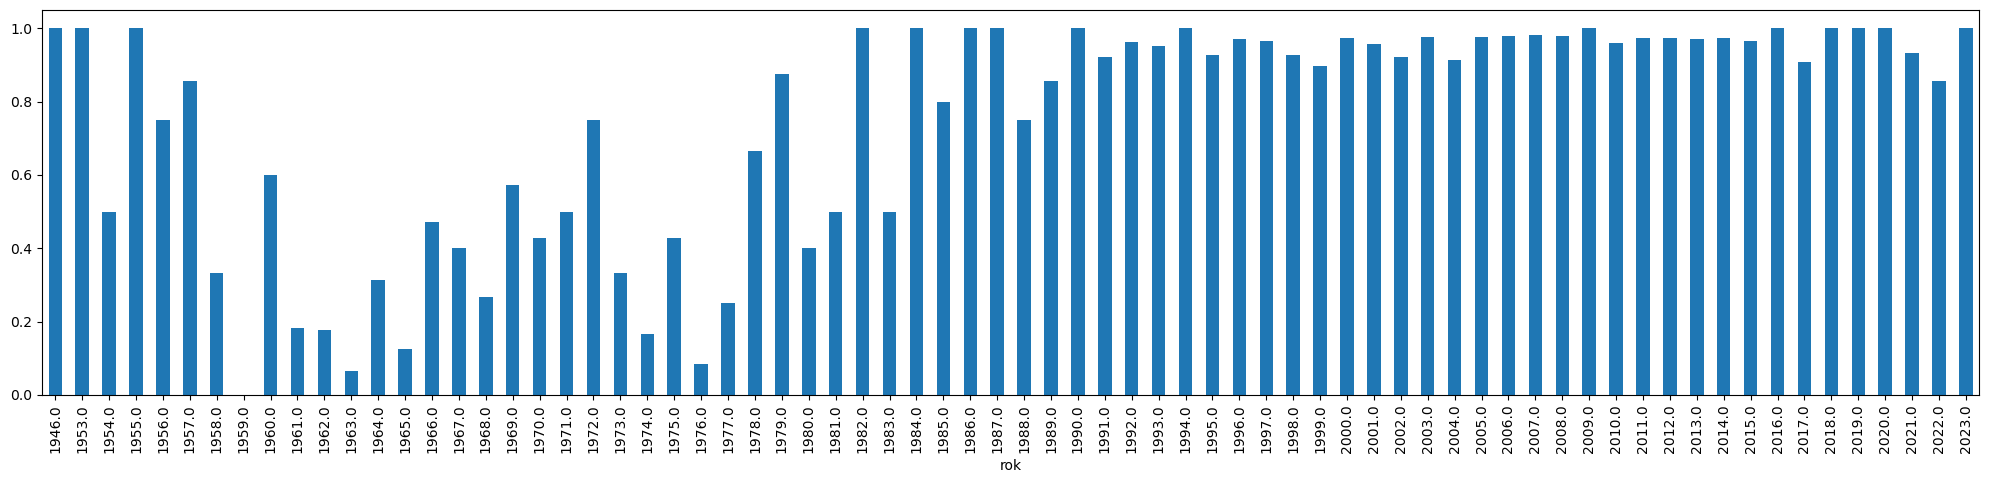

In [192]:
(df[df['kategorie'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [194]:
df.groupby(['vek','kategorie']).size()

vek   kategorie
22.0  poezie        3
24.0  poezie        3
26.0  poezie        4
      próza         1
28.0  poezie        3
29.0  poezie        4
30.0  poezie        4
      próza         1
31.0  poezie        4
32.0  poezie        4
33.0  poezie        7
      próza         1
34.0  poezie        6
      próza         1
35.0  poezie        5
36.0  poezie        6
37.0  poezie        2
38.0  poezie       10
      próza         1
39.0  poezie        5
      próza         1
40.0  poezie        6
41.0  poezie        4
      próza         2
42.0  poezie        6
      próza         2
43.0  poezie        9
      próza         1
44.0  poezie        5
45.0  poezie       10
46.0  poezie        7
47.0  poezie       12
48.0  poezie       14
49.0  poezie        6
50.0  poezie       18
      próza         2
51.0  poezie       17
      próza         1
52.0  poezie       16
53.0  poezie       17
      próza         1
54.0  poezie        9
55.0  poezie       15
      próza         1
56.0  poezie    

In [196]:
vysledek = pd.DataFrame(df.groupby(['vek','kategorie']).size()).reset_index(drop=False).pivot_table(index='vek', columns='kategorie', values='kategorie', aggfunc='sum', fill_value=0)

In [198]:
vysledek

kategorie,poezie,próza,vzpomínky
vek,,,
22.0,3,0,0
24.0,3,0,0
26.0,4,1,0
28.0,3,0,0
29.0,4,0,0
30.0,4,1,0
31.0,4,0,0
32.0,4,0,0
33.0,7,1,0


<Axes: xlabel='vek'>

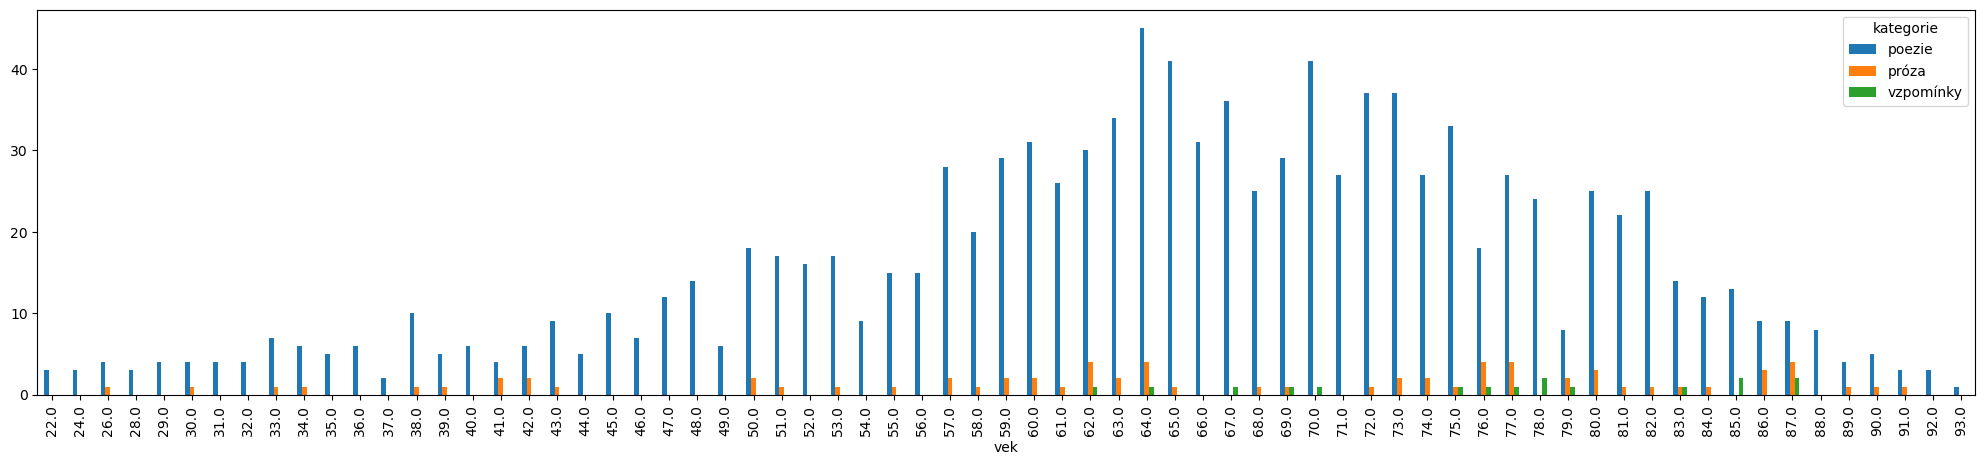

In [200]:
vysledek.plot.bar(figsize=(25,5))

In [202]:
kolikremesel = df.groupby('100_7')['kategorie'].nunique()
kolikermesel = kolikremesel[kolikremesel > 0]
pd.DataFrame(kolikermesel).groupby('kategorie').size() / len(kolikermesel)

kategorie
1    0.844444
2    0.140741
3    0.014815
dtype: float64

In [204]:
pd.DataFrame(kolikermesel).groupby('kategorie').size()

kategorie
1    228
2     38
3      4
dtype: int64

In [206]:
df2 = df[['rok','vek','655_a']].explode('655_a')

In [208]:
nejcastejsi_kategorie = df2.groupby('655_a').size()
nejcastejsi_kategorie = nejcastejsi_kategorie[nejcastejsi_kategorie >= 100]
nejcastejsi_kategorie = nejcastejsi_kategorie.index.to_list()

In [210]:
df2[df2['655_a'].isin(nejcastejsi_kategorie)].groupby('655_a')['vek'].median().sort_values()

655_a
poezie          59.0
česká poezie    67.0
Czech poetry    70.0
Name: vek, dtype: float64